# 911 Calls 



#DataSet
- This is a 911 Emergency Calls Dataset Taken from Kaggle
##Kaggle Link: https://www.kaggle.com/mchirico/montcoalert

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert)

## Import libraries


____
 **Importing numpy and pandas libraries**

In [93]:
import numpy as np
import pandas as pd

**Importing visualization libraries**


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

##Reading our dataset

In [95]:
data = pd.read_csv('911.csv')

##Exploring the dataset

In [96]:
#gives all information of the data
data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [97]:
#Describing all the statistics in our data
data.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [98]:
#shows the top 5 columns of the data
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [99]:
#The total number of row entities or samples
len(data)

99492

In [100]:
#The total number of columns or features
cols=data.columns
cols

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [101]:
#To find numeric columns in our dataset
data_num = data._get_numeric_data()
list(data_num)

['lat', 'lng', 'zip', 'e']

In [102]:
#To find categorical columns in our dataset
data_categorical=set(cols)-set(data_num)
list(data_categorical)

['twp', 'title', 'timeStamp', 'addr', 'desc']

###Zip_codes

Total number of zip counts

In [103]:
data['zip'].value_counts()  #104 zip codes

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
           ... 
77316.0       1
19457.0       1
19139.0       1
19119.0       1
17752.0       1
Name: zip, Length: 104, dtype: int64

The top 10 zipcodes for 911 calls


In [104]:
data['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

###Township(twp)

Total number of calls from different townships

In [105]:
data['twp'].value_counts()  #68 townships

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: twp, Length: 68, dtype: int64

 The top 10 townships (twp) for 911 calls

In [106]:
data['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

###Title

In [107]:
data['title'].nunique() #gives the number of unique townships

110

All the Titles of the calls received

In [108]:
data['title'].value_counts() #shows top 5 and least 5 titles of 911 calls

Traffic: VEHICLE ACCIDENT -        23066
Traffic: DISABLED VEHICLE -         7702
Fire: FIRE ALARM                    5496
EMS: RESPIRATORY EMERGENCY          5112
EMS: CARDIAC EMERGENCY              5012
                                   ...  
Fire: SYNCOPAL EPISODE                 1
Fire: UNKNOWN MEDICAL EMERGENCY        1
Fire: UNCONSCIOUS SUBJECT              1
Fire: DIABETIC EMERGENCY               1
EMS: DISABLED VEHICLE                  1
Name: title, Length: 110, dtype: int64

####Department

In [109]:
data['Department'] = data['title'].apply(lambda title: title.split(':')[0])

In [110]:
#shows the Reason new column which has the reasons specified
data['Department']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Department, Length: 99492, dtype: object

In [111]:
data['Department'].value_counts()  
#Most calls - EMS
#Least calls - Fire

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64

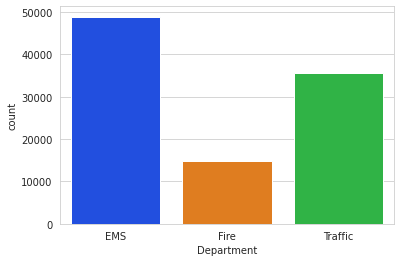

In [112]:
sns.countplot(x='Department',data=data,palette='bright')
plt.show()

####cause

In [113]:
data['cause'] = data['title'].apply(lambda title: title.split(':')[1])

In [114]:
data['cause']

0          BACK PAINS/INJURY
1         DIABETIC EMERGENCY
2              GAS-ODOR/LEAK
3          CARDIAC EMERGENCY
4                  DIZZINESS
                ...         
99487     VEHICLE ACCIDENT -
99488     VEHICLE ACCIDENT -
99489            FALL VICTIM
99490        NAUSEA/VOMITING
99491     VEHICLE ACCIDENT -
Name: cause, Length: 99492, dtype: object

In [115]:
data['cause'].value_counts()
#Most Cause - Vehicle accident
#Least cause - disabled vehicle

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
                          ...  
 POLICE INFORMATION           2
 ACTIVE SHOOTER               2
 PLANE CRASH                  2
 DISABLED VEHICLE             1
 BOMB DEVICE FOUND            1
Name: cause, Length: 81, dtype: int64

 The most common Reason for a 911 call based off of this new column 
 

In [116]:
top_cause=data['cause'].value_counts().iloc[:40].index
top_cause  #top 40 cause counts

Index([' VEHICLE ACCIDENT -', ' DISABLED VEHICLE -', ' VEHICLE ACCIDENT',
       ' FIRE ALARM', ' RESPIRATORY EMERGENCY', ' CARDIAC EMERGENCY',
       ' FALL VICTIM', ' ROAD OBSTRUCTION -', ' SUBJECT IN PAIN',
       ' HEAD INJURY', ' UNKNOWN MEDICAL EMERGENCY', ' SYNCOPAL EPISODE',
       ' SEIZURES', ' FIRE INVESTIGATION', ' GENERAL WEAKNESS',
       ' ABDOMINAL PAINS', ' ALTERED MENTAL STATUS', ' MEDICAL ALERT ALARM',
       ' HEMORRHAGING', ' CVA/STROKE', ' OVERDOSE', ' NAUSEA/VOMITING',
       ' UNCONSCIOUS SUBJECT', ' HAZARDOUS ROAD CONDITIONS -',
       ' GAS-ODOR/LEAK', ' BUILDING FIRE', ' DIABETIC EMERGENCY', ' DIZZINESS',
       ' BACK PAINS/INJURY', ' FIRE SPECIAL SERVICE', ' UNRESPONSIVE SUBJECT',
       ' ASSAULT VICTIM', ' CARBON MONOXIDE DETECTOR', ' FRACTURE',
       ' ELECTRICAL FIRE OUTSIDE', ' VEHICLE FIRE -', ' VEHICLE FIRE',
       ' WOODS/FIELD FIRE', ' CARDIAC ARREST', ' LACERATIONS'],
      dtype='object')

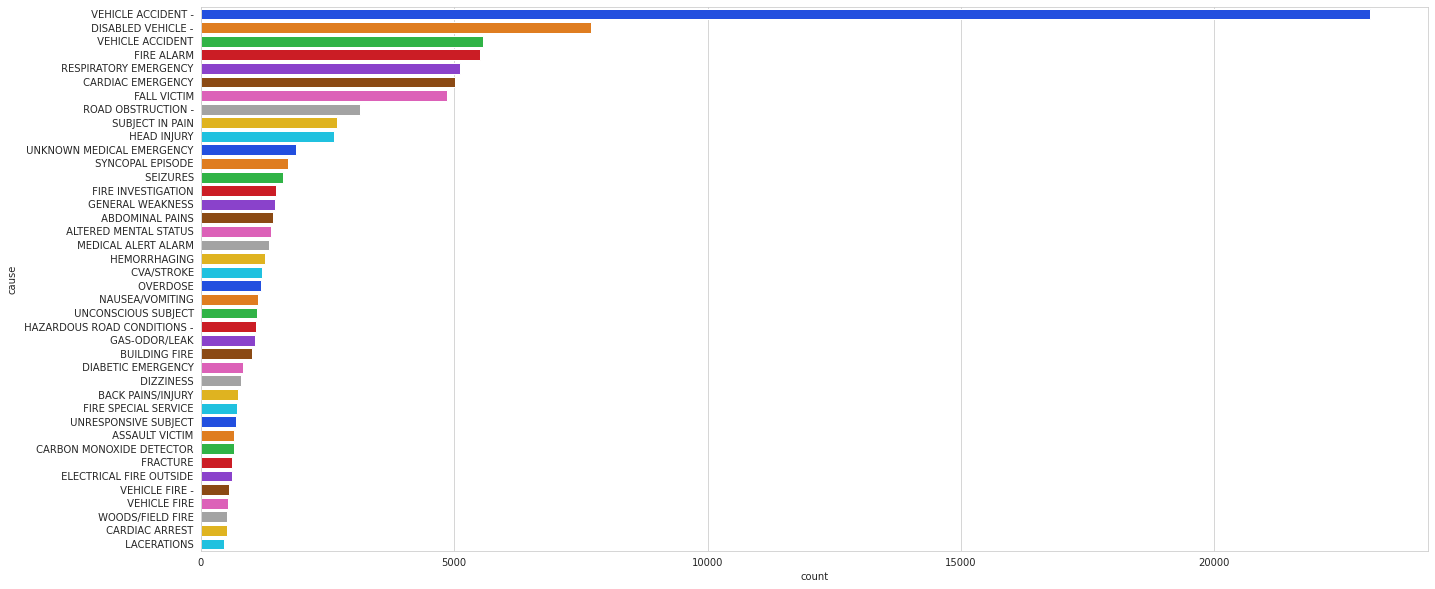

In [117]:
#Analyzing the top causes of the new 'cause' column in 'title' cloumn
plt.figure(figsize=(22,10))
sns.countplot(y='cause',order=top_cause,data=data,palette='bright')
plt.show()

In [118]:
data_ems=data[data['Department']=='EMS']['cause']
data_ems

0          BACK PAINS/INJURY
1         DIABETIC EMERGENCY
3          CARDIAC EMERGENCY
4                  DIZZINESS
5                HEAD INJURY
                ...         
99480     DIABETIC EMERGENCY
99481              DIZZINESS
99483      BACK PAINS/INJURY
99489            FALL VICTIM
99490        NAUSEA/VOMITING
Name: cause, Length: 48877, dtype: object

In [119]:
data_ems.value_counts()

 RESPIRATORY EMERGENCY    5112
 CARDIAC EMERGENCY        5012
 FALL VICTIM              4863
 VEHICLE ACCIDENT         3935
 SUBJECT IN PAIN          2687
                          ... 
 WARRANT SERVICE             2
 ELECTROCUTION               2
 PLANE CRASH                 1
 DISABLED VEHICLE            1
 BOMB DEVICE FOUND           1
Name: cause, Length: 68, dtype: int64

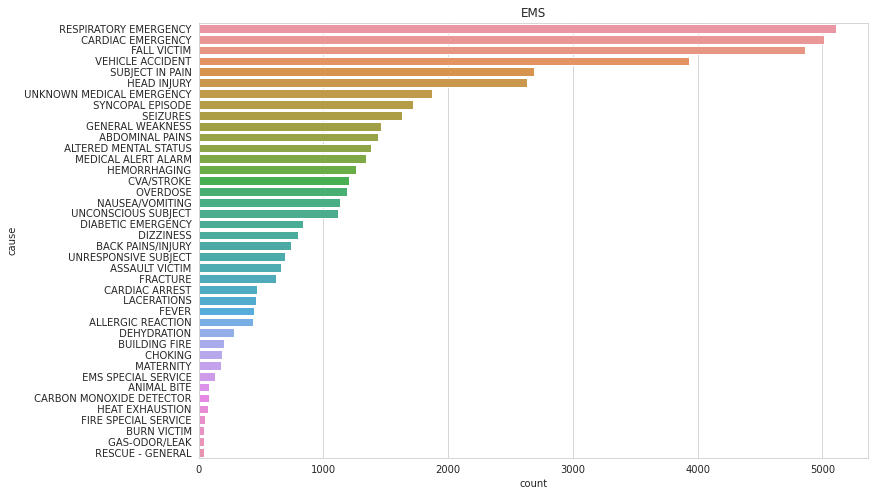

In [120]:
plt.figure(figsize=(12,8))
plt.title('EMS')
sns.countplot(y=data_ems,order=data_ems.value_counts().iloc[:40].index)
plt.show()
#The Department EMS most cause is 'RESPIRATORY EMERGENCY' and least cause is 'DISABLED VEHICLE,PLANE CRASH,BOMB DEVICE FOUND'

In [121]:
data_traffic=data[data['Department']=='Traffic']['cause']
data_traffic


9         VEHICLE ACCIDENT -
10        VEHICLE ACCIDENT -
11        VEHICLE ACCIDENT -
12        VEHICLE ACCIDENT -
13        VEHICLE ACCIDENT -
                ...         
99485     DISABLED VEHICLE -
99486     VEHICLE ACCIDENT -
99487     VEHICLE ACCIDENT -
99488     VEHICLE ACCIDENT -
99491     VEHICLE ACCIDENT -
Name: cause, Length: 35695, dtype: object

In [122]:
data_traffic.value_counts()
#The Department 'traffic' most cause is 'VEHICLE ACCIDENT' and least cause is ' DEBRIS/FLUIDS ON HIGHWAY'

 VEHICLE ACCIDENT -             23066
 DISABLED VEHICLE -              7702
 ROAD OBSTRUCTION -              3144
 HAZARDOUS ROAD CONDITIONS -     1086
 VEHICLE FIRE -                   553
 VEHICLE LEAKING FUEL -            77
 DEBRIS/FLUIDS ON HIGHWAY -        67
Name: cause, dtype: int64

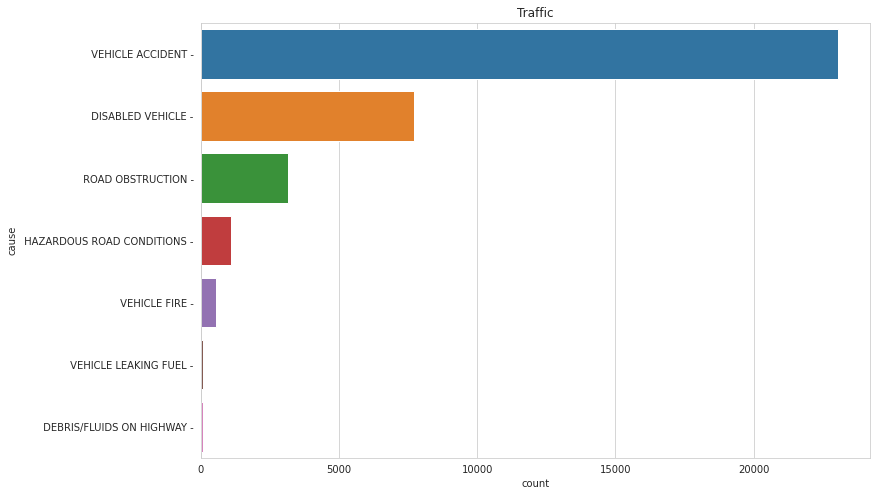

In [123]:
plt.figure(figsize=(12,8))
plt.title('Traffic')
sns.countplot(y=data_traffic,order=data_traffic.value_counts().iloc[:40].index)

In [124]:
data_fire=data[data['Department']=='Fire']['cause']
data_fire


2                    GAS-ODOR/LEAK
22                  APPLIANCE FIRE
27        CARBON MONOXIDE DETECTOR
41                   GAS-ODOR/LEAK
47                VEHICLE ACCIDENT
                   ...            
99450                   FIRE ALARM
99453             VEHICLE ACCIDENT
99468                   FIRE ALARM
99469                   FIRE ALARM
99484                   FIRE ALARM
Name: cause, Length: 14920, dtype: object

In [125]:
data_fire.value_counts()
#The Department 'fire' most cause is FIRE ALARM and least cause is 'DIABETIC EMERGENCY (few others) '

 FIRE ALARM                      5496
 VEHICLE ACCIDENT                1638
 FIRE INVESTIGATION              1460
 GAS-ODOR/LEAK                   1028
 BUILDING FIRE                    807
 FIRE SPECIAL SERVICE             666
 ELECTRICAL FIRE OUTSIDE          622
 CARBON MONOXIDE DETECTOR         575
 VEHICLE FIRE                     516
 WOODS/FIELD FIRE                 514
 UNKNOWN TYPE FIRE                322
 TRASH/DUMPSTER FIRE              229
 FIRE POLICE NEEDED               215
 APPLIANCE FIRE                   182
 RESCUE - ELEVATOR                178
 S/B AT HELICOPTER LANDING        104
 VEHICLE LEAKING FUEL              73
 DEBRIS/FLUIDS ON HIGHWAY          72
 RESCUE - GENERAL                  47
 CARDIAC ARREST                    42
 BURN VICTIM                       39
 PUMP DETAIL                       25
 TRANSFERRED CALL                  23
 RESCUE - WATER                    16
 RESCUE - TECHNICAL                10
 TRAIN CRASH                        5
 HAZARDOUS M

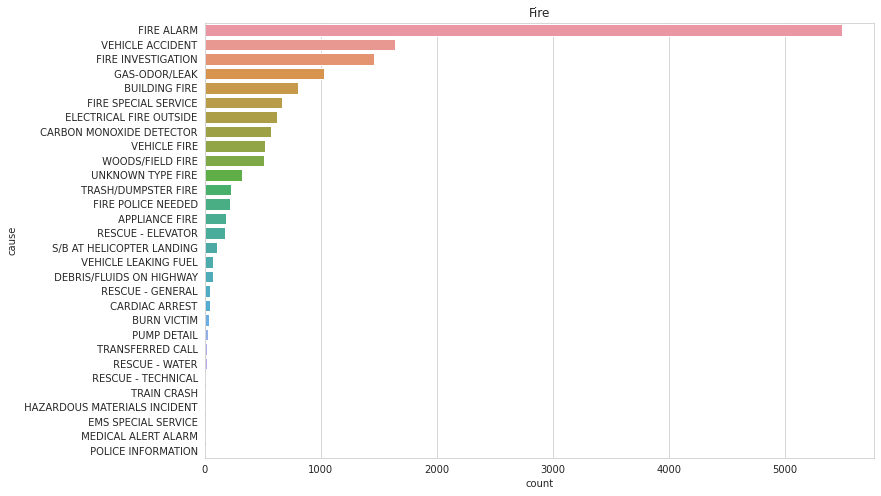

In [126]:
plt.figure(figsize=(12,8))
plt.title('Fire')
sns.countplot(y=data_fire,order=data_fire.value_counts().iloc[:30].index)
plt.show()

###TimeStamp

Time information: 

In [127]:
#The data type of the objects in the timeStamp column
type(data['timeStamp'].iloc[0])


str

In [128]:
#since these are strings,we covert it into DateTime Object using pd_todatetime
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [129]:
type(data['timeStamp'].iloc[0])
#coverted to timestaamp object

pandas._libs.tslibs.timestamps.Timestamp

In [130]:
#takes attributes from Datatime Object by calling them
time=data['timeStamp'].iloc[0] #example taken from first timeStamp
print(time.hour)
print(time.month)
print(time.dayofweek)
print(time.date())
print(time.year)

17
12
3
2015-12-10
2015


In [131]:
data['Date'] = data['timeStamp'].apply(lambda t: t.date())
data['Hour'] = data['timeStamp'].apply(lambda t: t.hour)
data['Month'] = data['timeStamp'].apply(lambda t: t.month)
data['Year'] = data['timeStamp'].apply(lambda x: x.year)
data['Day'] = data['timeStamp'].apply(lambda t: t.dayofweek)

In [132]:
data_with_timestamps = pd.DataFrame(data)
data_with_timestamps 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,cause,Date,Hour,Month,Year,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,2015-12-10,17,12,2015,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,2015-12-10,17,12,2015,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,2015-12-10,17,12,2015,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,2015-12-10,17,12,2015,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,2015-12-10,17,12,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,VEHICLE ACCIDENT -,2016-08-24,11,8,2016,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,VEHICLE ACCIDENT -,2016-08-24,11,8,2016,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,FALL VICTIM,2016-08-24,11,8,2016,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,NAUSEA/VOMITING,2016-08-24,11,8,2016,2


###Month

In [133]:
g_month = data.groupby('Month').count()

In [134]:
g_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,cause,Date,Hour,Year,Day
Month,,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969


In [135]:
data['Month']

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: Month, Length: 99492, dtype: int64

In [136]:
data['Month'].value_counts()
#The most calls in january and least in december

1     13205
7     12137
6     11786
2     11467
5     11423
4     11326
3     11101
8      9078
12     7969
Name: Month, dtype: int64

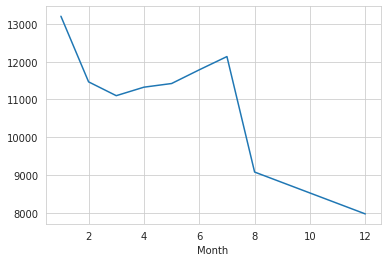

In [137]:
g_month['Department'].plot()
plt.show()

**Countplot of the Month
 column with the hue based off of the Department column.**

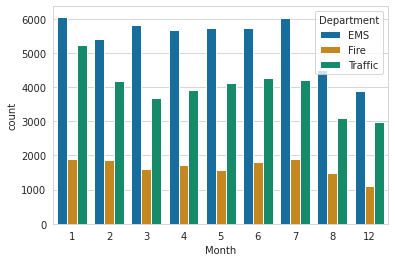

In [138]:
sns.countplot(x='Month',data=data,hue='Department',palette='colorblind')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


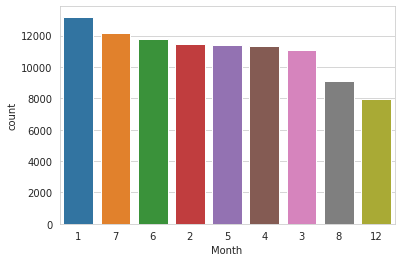

In [184]:
sns.countplot(data['Month'], order=data['Month'].value_counts().index)
plt.show()

###Year

In [139]:
g_year = data.groupby('Year').count()

In [140]:
g_year

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,cause,Date,Hour,Month,Day
Year,,,,,,,,,,,,,,,
2015,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969,7969
2016,91523,91523,91523,79730,91523,91523,91486,91057,91523,91523,91523,91523,91523,91523,91523


In [141]:
data['Year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
99487    2016
99488    2016
99489    2016
99490    2016
99491    2016
Name: Year, Length: 99492, dtype: int64

In [142]:
data['Year'].value_counts()

2016    91523
2015     7969
Name: Year, dtype: int64

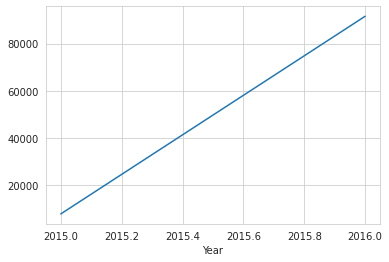

In [143]:
g_year['Department'].plot()
plt.show()

**Countplot of the year
 column with the hue based off of the Department column.**

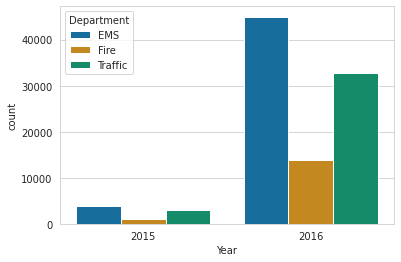

In [144]:
sns.countplot(x='Year',data=data,hue='Department',palette='colorblind')
plt.show()
#it shows EMS is the most in Department in the year 2016

###Date

In [145]:
g_date = data.groupby('Date').count()

In [146]:
g_date

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,cause,Hour,Month,Year,Day
Date,,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389,389,389


In [147]:
data['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [148]:
data['Date'].value_counts()
#The most calls on 23rd of jan in 2016 and the least on 10th of dec in 2015

2016-01-23    913
2016-02-24    679
2016-01-24    662
2016-01-12    588
2016-04-03    586
             ... 
2016-02-07    255
2016-03-20    244
2016-05-01    140
2016-08-24    132
2015-12-10    115
Name: Date, Length: 259, dtype: int64

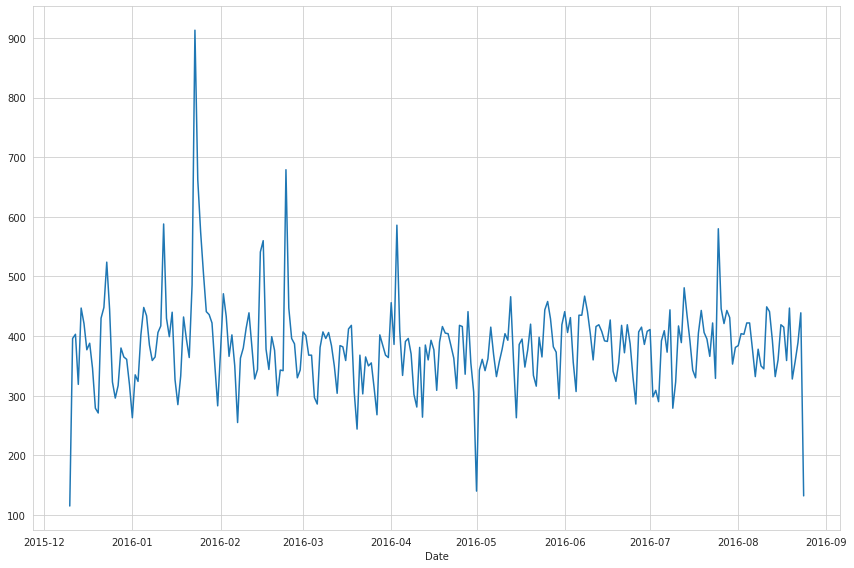

In [149]:
plt.figure(figsize=(12,8))
g_date['Department'].plot()
plt.tight_layout()
plt.show()

**The count of townships in each date due to traffic**

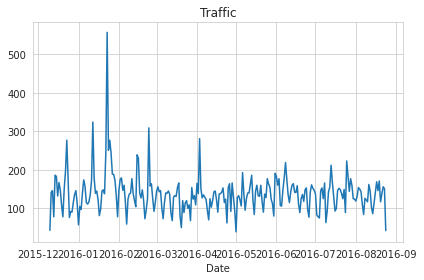

In [150]:
data[data['Department']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

**The count of townships in each date due to fire**

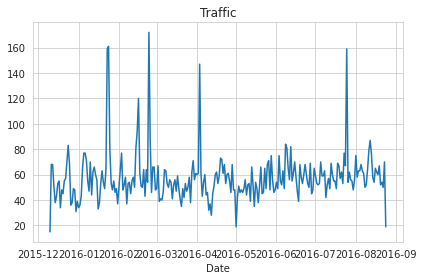

In [151]:
data[data['Department']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

**The count of townships in each date due to EMS**

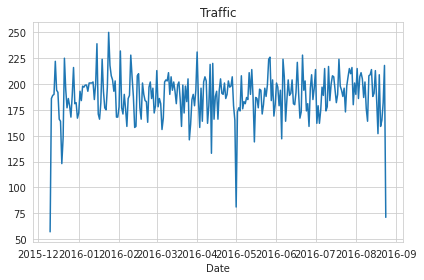

In [152]:
data[data['Department']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

###Hour

In [153]:
data['Hour'].value_counts()
#The most calls at 17 hours (5 PM) and least at 4 hours (4 AM)

17    6517
16    6490
15    6154
12    6029
14    5997
13    5967
18    5762
11    5543
10    5413
9     5314
8     5044
19    4908
20    4377
7     3970
21    3788
22    3283
23    2559
6     2513
0     2112
1     1721
5     1629
2     1549
3     1435
4     1418
Name: Hour, dtype: int64

In [154]:
g_hour=data.groupby('Hour').count()

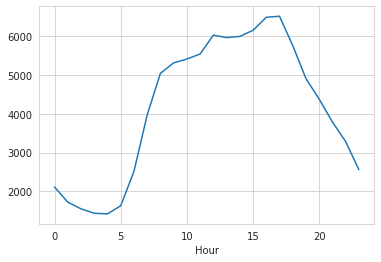

In [155]:
g_hour['Department'].plot()
plt.show()
#e observe that maximum calls at 17 and least at 4 (Hour)

###Days

In [156]:
d = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#assigning the days in a week to numbers from 0-6

In [157]:
data['Day'] = data['Day'].map(d)

In [158]:
data['Day']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day, Length: 99492, dtype: object

In [189]:
data['Day'].value_counts()
#The most calls on Tuesday and least on Sunday

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Sat    13336
Sun    12136
Name: Day, dtype: int64

In [160]:
g_day = data.groupby('Day').count()

In [161]:
g_day

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,cause,Date,Hour,Month,Year
Day,,,,,,,,,,,,,,,
Fri,14833,14833,14833,12887,14833,14833,14830,14758,14833,14833,14833,14833,14833,14833,14833
Mon,14680,14680,14680,12763,14680,14680,14674,14627,14680,14680,14680,14680,14680,14680,14680
Sat,13336,13336,13336,11612,13336,13336,13330,13234,13336,13336,13336,13336,13336,13336,13336
Sun,12136,12136,12136,10558,12136,12136,12130,12095,12136,12136,12136,12136,12136,12136,12136
Thu,14478,14478,14478,12580,14478,14478,14474,14408,14478,14478,14478,14478,14478,14478,14478
Tue,15150,15150,15150,13207,15150,15150,15143,15057,15150,15150,15150,15150,15150,15150,15150
Wed,14879,14879,14879,13030,14879,14879,14868,14794,14879,14879,14879,14879,14879,14879,14879


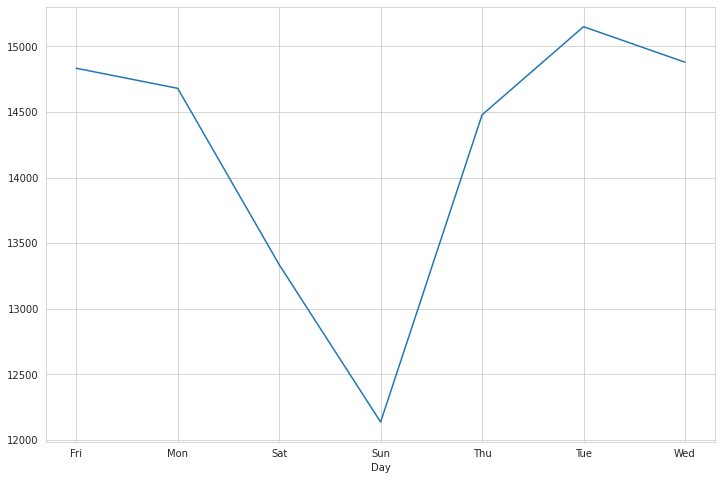

In [162]:
plt.figure(figsize=(12,8))
g_day['Department'].plot()
plt.show()

**The count of townships in each day due to traffic**

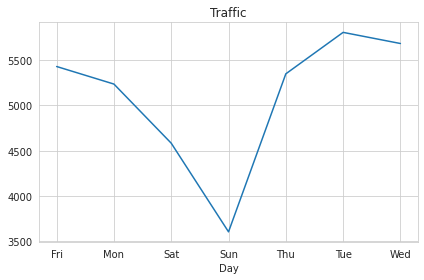

In [163]:
data[data['Department']=='Traffic'].groupby('Day').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()
#Maximum on Tue and least on Sun due to 'fire'

**The count of townships in each day due to fire**

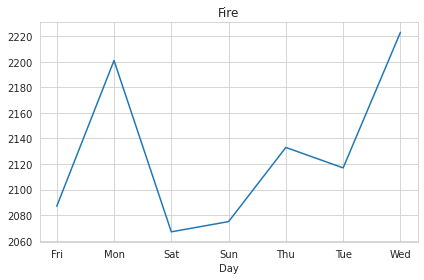

In [164]:
data[data['Department']=='Fire'].groupby('Day').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()
#Maximum on Wed and least on Sat due to 'fire'

**The count of townships in each day due to EMS**

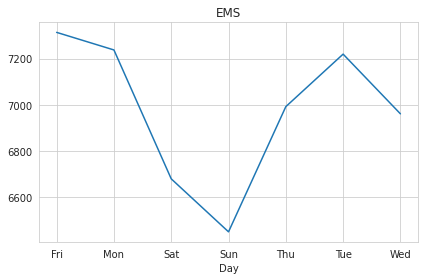

In [165]:
data[data['Department']=='EMS'].groupby('Day').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
#Maximum on Fri and least on Sun due to 'fire'

**Countplot of the Day
 column with the hue based off of the Department column.**

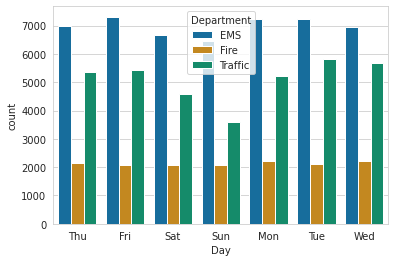

In [166]:
sns.countplot(x='Day',data=data,hue='Department',palette='colorblind')
plt.show()

In [167]:
day_year = data.groupby(by=['Day','Year']).count()['Department'].unstack()
day_year

Year,2015,2016
Day,,
Fri,1065,13768
Mon,1257,13423
Sat,978,12358
Sun,907,11229
Thu,1266,13212
Tue,1234,13916
Wed,1262,13617


###Day and year matrix

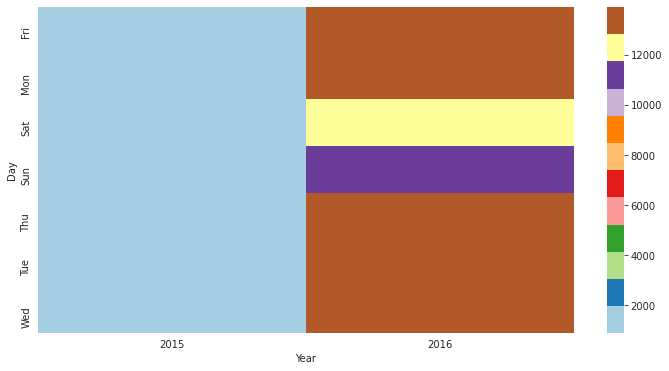

In [168]:
plt.figure(figsize=(12,6))
sns.heatmap(day_year,cmap='Paired')

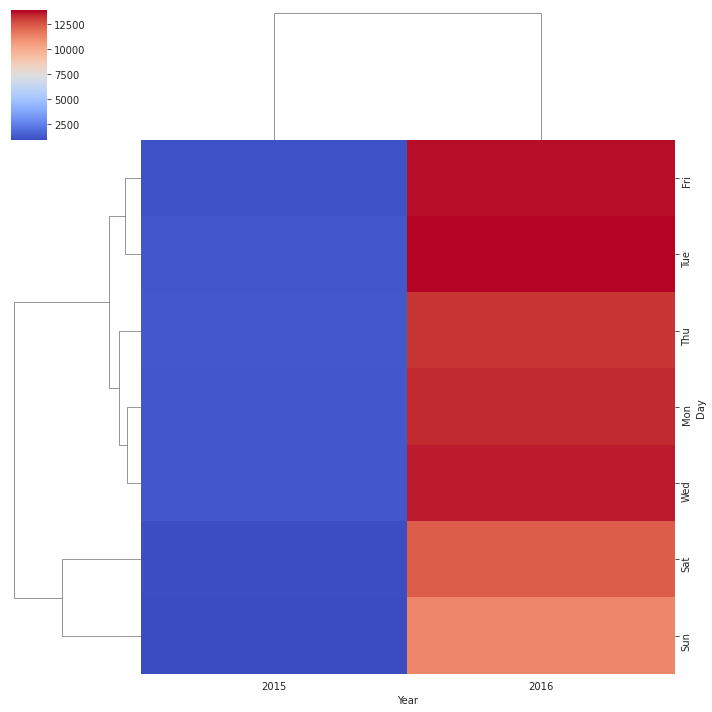

In [193]:
sns.clustermap(day_year,cmap='coolwarm')
plt.show()
#it shows maximum  on friday in 2016 and the least on sunday in 2015

###Day and Month matrix

In [215]:
day_month = data.groupby(by=['Day','Month']).count()['Department'].unstack()
day_month

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


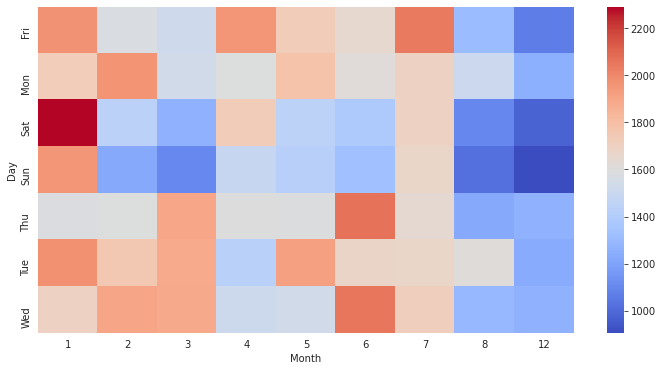

In [171]:
plt.figure(figsize=(12,6))
sns.heatmap(day_month,cmap='coolwarm')
plt.show()

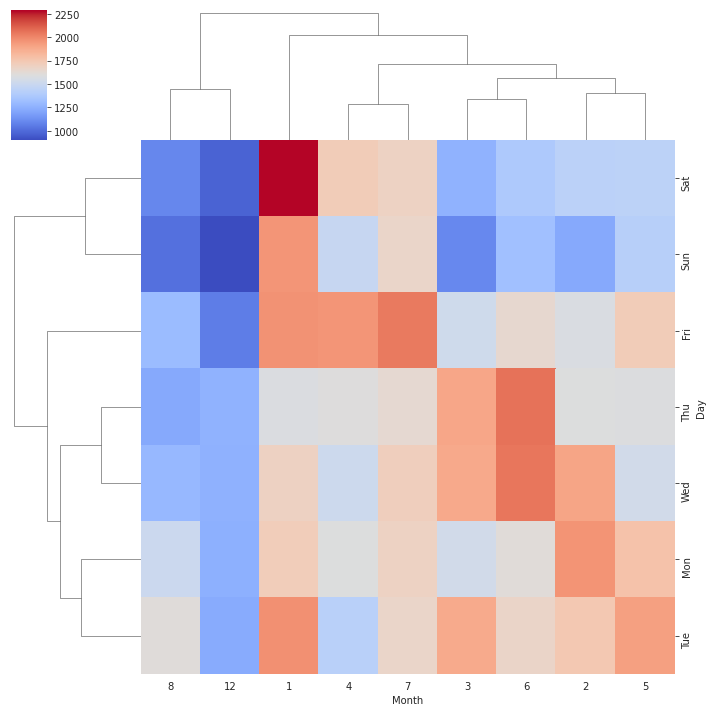

In [199]:
sns.clustermap(day_month,cmap='coolwarm')
plt.show()
#it shows maximum on Saturday Januaury and least on Sunday December

##Data Analysis Results

###Township
- Most calls recieved in **Lower Merion**
- Least calls recieved in **Lehigh Country**
 
###Department
- Most calls recieved in **EMS**
- Least calls recieved in **Fire**

###Cause
- Most calls recieved in **Vehicle Accident**
- Least calls recieved in **Disabled Vehicle**

###Month
- Most calls recieved in **January**
- Least calls recieved in **December**

###Year
- Most calls recieved in **2016**
- Least calls recieved in **2015**

###Date
- Most calls recieved in **2016-01-23**
- Least calls recieved in **2015-12-10**

###Hour
- Most calls recieved in **17(5 PM)**
- Least calls recieved in **4(4 AM)**

###Day
- Most calls recieved in **Tuesday**
- Least calls recieved in **Sunday**

###Day and year Matrix
- Most calls recieved on **Friday in 2016** 
- Least calls recieved on **Sunday in 2015**

###Day and Month Matrix
- Most calls recieved on **Saturday Januaury**
- Least calls recieved on **Sunday December**
